In [1]:
import numpy as np


    
def upwinding_function(Pe, isSG):
    if isSG:
        coth = 1+2/(np.exp(2*Pe)-1)
        return Pe*coth
    else:
        return 1 + np.absolute(Pe)
        
def numericalFlux(u, dx, mu, c, normal, useSG):
    """"""
    beta = normal*c
    beta = c
    Pe = c*dx/2/mu
    k = upwinding_function(Pe, useSG)
    return normal*(mu*k*(u[0]-u[1])/dx - c*(u[1]+u[0])/2 )
    # return - beta*(u[1]+u[0])/2 + normal* mu*(u[0]-u[1])/dx
    # return normal*(mu*(u[0]-u[1])/dx - c*u[0] ) # upwinding

def numericalFlux2(u, dx, mu, c, normal, useSG):
    if useSG:
        a = -dx*c/mu/2
        B1 = -2*a/(np.exp(-2*a)-1)
        B2 = 2*a/(np.exp(2*a)-1)
        return mu/dx*(u[0]*B1 - u[1]*B2)*normal
    else:
        return normal*(mu*(u[0]-u[1])/dx - c*u[0] ) 

In [2]:

X = np.arange(0,1,0.025)

dx = X[1] - X[0]
Uinit = X*0
for i in range(int(len(X)/3)):
    Uinit[i] = 1
RHS = Uinit * 0
RHS_SG = Uinit * 0
U = Uinit *1
U_SG = Uinit *1
c = 1
mu = 0.025

dt = .05*dx/c
T = np.arange(0,.2,dt)
for n, t in enumerate(T):
    #print(n, t)
    for i, u in enumerate(U):
        if i > 0 and i < len(U)-1:
            du_r = [U[i+1],U[i]]
            du_l = [U[i],U[i-1]]
        elif i == 0:
            du_r = [U[i+1],U[i]]
            du_l = [U[i],U[len(U)-1]]
        elif i == len(U)-1:
            du_r = [U[0],U[i]]
            du_l = [U[i],U[i-1]]
        fr = numericalFlux2(du_r, dx, mu, c, 1, False)
        fl = numericalFlux2(du_l, dx, mu, c, -1, False)
        RHS[i] = (fr+fl)/dx
        
        if i > 0 and i < len(U)-1:
            du_r = [U_SG[i+1],U_SG[i]]
            du_l = [U_SG[i],U_SG[i-1]]
        elif i == 0:
            du_r = [U_SG[i+1],U_SG[i]]
            du_l = [U_SG[i],U_SG[len(U_SG)-1]]
        elif i == len(U_SG)-1:
            du_r = [U_SG[0],U_SG[i]]
            du_l = [U_SG[i],U_SG[i-1]]
        fr = numericalFlux2(du_r, dx, mu, c, 1, True)
        fl = numericalFlux2(du_l, dx, mu, c, -1, True)
        RHS_SG[i] = (fr+fl)/dx
    U = U + dt*RHS
    U_SG = U_SG + dt*RHS_SG
    

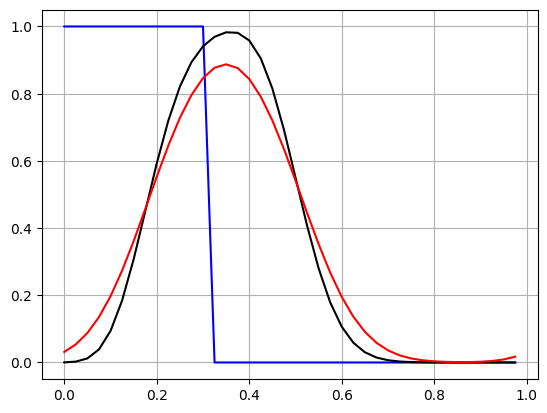

In [3]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(X,Uinit,'b')
plt.plot(X,U, 'k')
plt.plot(X,U_SG, 'r')
plt.grid()
plt.show()